# Parsing dates

# Get environment steup

First thing we will do is loading our dataset and required libraries

In [1]:
# moudles we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# loading our dataset
df = pd.read_csv(r'D:\jypyter notebooks\kaggle\Untitled Folder\dataset\catalog.csv')

# set seed for reproducibility
np.random.seed(0)

now we will look at our data

# Check datatypes pf columns
 we will begin by checking first 5 rows of our dataset
 

In [2]:
df.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


we will work with date column of our landslide dataframe

In [3]:
df['date'].head()

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object

Yep, those are dates! But just because we,  humans, can tell that these are dates doesn't mean that Python knows that they're dates. Notice that at the bottom of the output of head(), you can see that it says that the data type of this column is "object".

Pandas uses the "object" dtype for storing various types of data types, but most often when you see a column with the dtype "object" it will have strings in it.

If you check the pandas dtype documentation here, you'll notice that there's also a specific datetime64 dtypes. Because the dtype of our column is object rather than datetime64, we can tell that Python doesn't know that this column contains dates.



We can also look at just the dtype of a column without printing the first few rows:



In [4]:
# checking dtype of our date column
df['date'].dtype # O means object

dtype('O')

# Convert dtype of our date column to datetime 

Now that we know that our date column isn't being recognized as a date, it's time to convert it so that it is recognized as a date. This is called <b>"parsing dates"</b> because we're <i> taking in a string and identifying its component parts</i>.

We can determine what the format of our dates are with a guide called "strftime directive", which you can find more information on at this link ( https://strftime.org/ ) . The basic idea is that you need to point out which parts of the date are where and what punctuation is between them. There are lots of possible parts of a date, but the most common are %d for day, %m for month, %y for a two-digit year and %Y for a four digit year.

 examples:

<ul>1/17/07 has the format "%m/%d/%y"</ul>
<ul>17-1-2007 has the format "%d-%m-%Y"</ul>

Looking back up at the head of the "date" column in the landslides dataset, we can see that it's in the format "month/day/two-digit year", so we can use the same syntax as the first example to parse in our dates:

In [13]:
# create new column parsed_date with date parsed.
df['parsed_date'] = pd.to_datetime( df['date'], format = "%d/%M/%y" )

In [14]:
df['parsed_date'].head()

0   2007-01-03 00:02:00
1   2007-01-03 00:22:00
2   2007-01-04 00:06:00
3   2007-01-04 00:14:00
4   2007-01-04 00:15:00
Name: parsed_date, dtype: datetime64[ns]

After parsing our dates we can work with them easly in many useful ways.


Sometimes we'll run into an error when there are multiple date formats in a single column. If that happens, we can have pandas try to infer what the right date format should be. we can do that like so:<br>
                 <b> landslides['date_parsed'] = pd.to_datetime(landslides['Date'], infer_datetime_format=True)</b>

Why don't you always use infer_datetime_format = True? There are two big reasons not to always have pandas guess the time format. The first is that pandas won't always been able to figure out the correct date format, especially if someone has gotten creative with data entry. The second is that it's much slower than specifying the exact format of the dates.


# Select day of month

In [20]:
# get the day of month from parsed date
day_of_landslide = df['parsed_date'].dt.day
day_of_landslide.head()

0    3.0
1    3.0
2    4.0
3    4.0
4    4.0
Name: parsed_date, dtype: float64

If we tried to get the same information from the original "date" column, we would get an error: AttributeError: Can only use .dt accessor with datetimelike values. This is because dt.day doesn't know how to deal with a column with the dtype "object". Even though our dataframe has dates in it, we have to parse them before we can interact with them in a useful way.

# Plot the day of month to check the date parsing

One of the biggest dangers in parsing dates is mixing up the months and days. The to_datetime() function does have very helpful error messages, but it doesn't hurt to double-check that the days of the month we've extracted make sense.

To do this, let's plot a histogram of the days of the month. We expect it to have values between 1 and 31 and, since there's no reason to suppose the landslides are more common on some days of the month than others, a relatively even distribution. (With a dip on 31 because not all months have 31 days.) Let's see if that's the case:



<AxesSubplot:xlabel='parsed_date'>

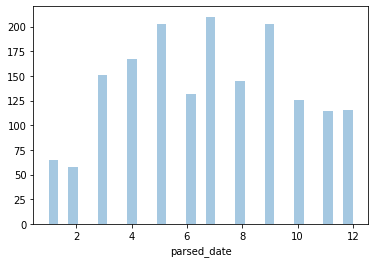

In [21]:
# remove na's
day_of_month_of_landslide = day_of_landslide.dropna()

# plot the day of month
sns.distplot( day_of_month_of_landslide , kde=False , bins=31 )

In [22]:
day_of_month_of_landslide.unique()

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,  1.,  2.])

In [27]:
df['parsed_date'].dt.day.max()

12.0